In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 
coordinates 

[(-17.670404231238237, -105.37096641048296),
 (-43.362305629113756, -84.49922930188897),
 (87.61650118436779, 163.2611169792466),
 (-70.11821229599386, -27.816153687029157),
 (85.18736277802066, -16.21381996381757),
 (23.91040863401315, -126.60959124910491),
 (19.985666508240172, -83.02637949782527),
 (19.980726930923893, 27.487074604737046),
 (29.287914464065963, 79.45429796094191),
 (20.81465010064069, -168.7267551806118),
 (62.05310929079167, 5.216364129987113),
 (15.732193687258544, 12.041154332087814),
 (18.59278423873461, -62.653997300315),
 (50.668116877405225, -158.27835405651416),
 (-28.06354859239017, -132.60075088522518),
 (34.58527544012209, 0.6756328391342379),
 (-23.361387747681206, 130.3037393202614),
 (47.73566174464287, 148.4296637381923),
 (-6.720164293046508, 17.37293784213489),
 (23.34185560364729, -130.39053055808168),
 (-86.33650271432865, 79.95901073393117),
 (-84.45170451894597, 13.17014037772418),
 (11.899674900592274, 13.295866601624311),
 (69.82148529696562, 

In [53]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [54]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [74]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [55]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [56]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [76]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [77]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | puerto ayora
Processing Record 2 of Set 12 | castro
Processing Record 3 of Set 12 | cherskiy
Processing Record 4 of Set 12 | ushuaia
Processing Record 5 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 12 | lompoc
Processing Record 7 of Set 12 | west bay
Processing Record 8 of Set 12 | marawi
Processing Record 9 of Set 12 | haldwani
Processing Record 10 of Set 12 | kapaa
Processing Record 11 of Set 12 | raudeberg
Processing Record 12 of Set 12 | diffa
Processing Record 13 of Set 12 | the valley
Processing Record 14 of Set 12 | kodiak
Processing Record 15 of Set 12 | rikitea
Processing Record 16 of Set 12 | aflu
City not found. Skipping...
Processing Record 17 of Set 12 | yulara
Processing Record 18 of Set 12 | vostok
Processing Record 19 of Set 12 | kasongo-lunda
Processing Record 20 of Set 12 | busselton
Processing Record 21 of Set 12 | bredasdorp
Processing Record 22 of Set 12 | maiduguri
Processing Record 23 of Set 1

Processing Record 34 of Set 15 | kolochava
Processing Record 35 of Set 15 | wichita falls
Processing Record 36 of Set 15 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 15 | marcona
City not found. Skipping...
Processing Record 38 of Set 15 | ponta do sol
Processing Record 39 of Set 15 | samalaeulu
City not found. Skipping...
Processing Record 40 of Set 15 | esperance
Processing Record 41 of Set 15 | raul soares
Processing Record 42 of Set 15 | isangel
Processing Record 43 of Set 15 | hilo
Processing Record 44 of Set 15 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 15 | chanika
Processing Record 46 of Set 15 | isabela
Processing Record 47 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 15 | caravelas
Processing Record 49 of Set 15 | sinnamary
Processing Record 50 of Set 15 | samana
Processing Record 1 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 16 | mirabad
Processing Recor

Processing Record 18 of Set 19 | kupang
Processing Record 19 of Set 19 | kandrian
Processing Record 20 of Set 19 | fereydunshahr
Processing Record 21 of Set 19 | vyshneve
Processing Record 22 of Set 19 | kaili
Processing Record 23 of Set 19 | guider
Processing Record 24 of Set 19 | rondonopolis
Processing Record 25 of Set 19 | bandarbeyla
Processing Record 26 of Set 19 | soyo
Processing Record 27 of Set 19 | ust-kuyga
Processing Record 28 of Set 19 | smithers
Processing Record 29 of Set 19 | russell
Processing Record 30 of Set 19 | nome
Processing Record 31 of Set 19 | jalu
Processing Record 32 of Set 19 | grand centre
City not found. Skipping...
Processing Record 33 of Set 19 | gejiu
Processing Record 34 of Set 19 | rawson
Processing Record 35 of Set 19 | alim
Processing Record 36 of Set 19 | totness
Processing Record 37 of Set 19 | chumikan
Processing Record 38 of Set 19 | andrelandia
Processing Record 39 of Set 19 | kropotkin
Processing Record 40 of Set 19 | teahupoo
Processing Reco

Processing Record 4 of Set 23 | sangar
Processing Record 5 of Set 23 | itaueira
Processing Record 6 of Set 23 | katobu
Processing Record 7 of Set 23 | saint-joseph
Processing Record 8 of Set 23 | basco
Processing Record 9 of Set 23 | kavaje
Processing Record 10 of Set 23 | yar
Processing Record 11 of Set 23 | byron bay
Processing Record 12 of Set 23 | anchorage
Processing Record 13 of Set 23 | maglaj
Processing Record 14 of Set 23 | vestbygda
City not found. Skipping...
Processing Record 15 of Set 23 | coromoro
Processing Record 16 of Set 23 | mutoko
Processing Record 17 of Set 23 | sinkat
City not found. Skipping...
Processing Record 18 of Set 23 | mareeba
Processing Record 19 of Set 23 | kodlipet
Processing Record 20 of Set 23 | kenai
Processing Record 21 of Set 23 | kolondieba
Processing Record 22 of Set 23 | illintsi
Processing Record 23 of Set 23 | port keats
Processing Record 24 of Set 23 | mikhaylovka
Processing Record 25 of Set 23 | bargal
City not found. Skipping...
Processing

In [80]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,76.59,84,89,4.41,EC,2022-03-07 04:38:59
1,Castro,-24.7911,-50.0119,63.36,90,30,2.37,BR,2022-03-07 04:38:59
2,Cherskiy,68.7500,161.3000,-13.34,93,67,4.12,RU,2022-03-07 04:39:00
3,Ushuaia,-54.8000,-68.3000,38.86,93,75,9.22,AR,2022-03-07 04:34:23
4,Lompoc,34.6391,-120.4579,50.56,84,0,17.00,US,2022-03-07 04:35:52
5,West Bay,19.3667,-81.4167,79.07,87,35,3.00,KY,2022-03-07 04:39:01
6,Marawi,7.9986,124.2928,72.64,88,92,5.55,PH,2022-03-07 04:39:01
7,Haldwani,29.2167,79.5167,77.23,31,100,3.94,IN,2022-03-07 04:39:01
8,Kapaa,22.0752,-159.3190,75.52,68,0,3.44,US,2022-03-07 04:39:02
9,Raudeberg,61.9875,5.1352,40.87,83,100,19.98,NO,2022-03-07 04:39:02


In [89]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']  
city_data_df = city_data_df[city_data_reordered] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-03-07 04:38:59,-0.7393,-90.3518,76.59,84,89,4.41
1,Castro,BR,2022-03-07 04:38:59,-24.7911,-50.0119,63.36,90,30,2.37
2,Cherskiy,RU,2022-03-07 04:39:00,68.7500,161.3000,-13.34,93,67,4.12
3,Ushuaia,AR,2022-03-07 04:34:23,-54.8000,-68.3000,38.86,93,75,9.22
4,Lompoc,US,2022-03-07 04:35:52,34.6391,-120.4579,50.56,84,0,17.00
5,West Bay,KY,2022-03-07 04:39:01,19.3667,-81.4167,79.07,87,35,3.00
6,Marawi,PH,2022-03-07 04:39:01,7.9986,124.2928,72.64,88,92,5.55
7,Haldwani,IN,2022-03-07 04:39:01,29.2167,79.5167,77.23,31,100,3.94
8,Kapaa,US,2022-03-07 04:39:02,22.0752,-159.3190,75.52,68,0,3.44
9,Raudeberg,NO,2022-03-07 04:39:02,61.9875,5.1352,40.87,83,100,19.98


In [92]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [93]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

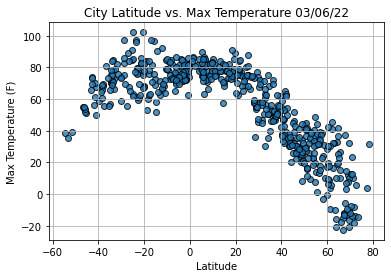

In [95]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

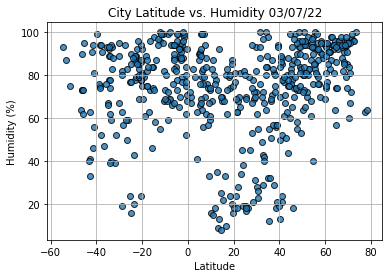

In [96]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

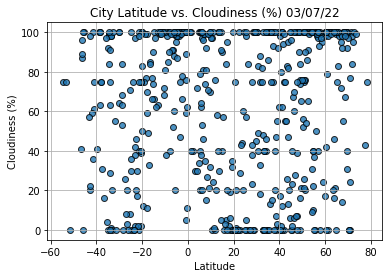

In [97]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

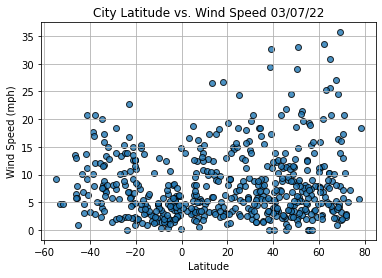

In [98]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()